In [19]:
# TASK 1
from sympy import integrate, Symbol, sin, simplify
from scipy.stats import expon, norm
from scipy import integrate as int
from pynverse import inversefunc
import numpy as np
import math
import matplotlib.pyplot as plt

x1 = Symbol('x')
y1 = Symbol('y')
t = Symbol('t')
fxy = 0.5 * sin(x1 + y1)

# Одномерные плотности распределения
fx = integrate(fxy, (y1, 0, math.pi / 2))
fy = integrate(fxy, (x1, 0, math.pi / 2))
print(f'Одномерная плотность распределения f(x): {simplify(fx)}')
print(f'Одномерная плотность распределения f(y): {simplify(fy)}')

print(f'f(x) * f(y): {simplify(fx * fy)}')

# Условные плотности распределения
print(f'Условная плотность распределения f(x|y): {simplify(fxy / fy)}')
print(f'Условная плотность распределения f(y|x): {simplify(fxy / fx)}')

# Безусловные математические ожидания
Mx: float = integrate(fx * x1, (x1, 0, math.pi / 2))
My: float = integrate(fy * y1, (y1, 0, math.pi / 2))
print(f'М(x): {Mx}')
print(f'М(y): {My}')

# Безусловные дисперсии
D_x: float = integrate(fx * x1 ** 2, (x1, 0, math.pi / 2)) - Mx ** 2
D_y: float = integrate(fy * y1 ** 2, (y1, 0, math.pi / 2)) - My ** 2
print(f'Безусловная дисперсия D(x): {D_x}')
print(f'Безусловная дисперсия  D(y): {D_y}')

# Математическое ожидание двумерной случайной величины
Mxy = integrate(fxy * x1 * y1, (y1, 0, math.pi / 2), (x1, 0, math.pi / 2))
print(f'Математическое ожидание двумерной случайной величины M(x,y): {Mxy}')
print(f'Ковариация cov_xy: {Mxy - Mx * My}')
print(f'Корреляция Пирсона r_xy: {(Mxy - Mx * My) / (math.sqrt(D_x * D_y))}')

Fxy = integrate(fxy, (y1, 0, y1), (x1, 0, x1))
print(f'Функция распределения F(x, y): {Fxy}')

Fx = integrate(fx.replace(x1, t), (t, 0, x1))
print(f'Одномерная функция распределения F(x): {simplify(Fx)}')

F_y_x = integrate(simplify(fxy / fx).replace(y1, t), (t, 0, y1))
print(f'Одномерная функция распределения y при условии x F(y|x): {F_y_x}')


Одномерная плотность распределения f(x): 0.5*sqrt(2)*sin(x + pi/4)
Одномерная плотность распределения f(y): 0.5*sqrt(2)*sin(y + pi/4)
f(x) * f(y): 0.5*sin(x + pi/4)*sin(y + pi/4)
Условная плотность распределения f(x|y): 0.5*sqrt(2)*sin(x + y)/sin(y + pi/4)
Условная плотность распределения f(y|x): 0.5*sqrt(2)*sin(x + y)/sin(x + pi/4)
М(x): 0.785398163397448
М(y): 0.785398163397448
Безусловная дисперсия D(x): 0.187646601862981
Безусловная дисперсия  D(y): 0.187646601862981
Математическое ожидание двумерной случайной величины M(x,y): 0.570796326794896
Ковариация cov_xy: -0.0460539482731885
Корреляция Пирсона r_xy: -0.245429162137542
Функция распределения F(x, y): 0.5*sin(x) + 0.5*sin(y) - 0.5*sin(x + y)
Одномерная функция распределения F(x): -0.5*sqrt(2)*cos(x + pi/4) + 0.5
Одномерная функция распределения y при условии x F(y|x): 0.5*sqrt(2)*cos(x)/sin(x + pi/4) - 0.5*sqrt(2)*cos(x + y)/sin(x + pi/4)


In [20]:
def f_x_pdf(x): # одномерная плотность распределения
    return 0.5 * math.sqrt(2) * math.sin(x + math.pi/4)

def f_x_y_pdf(x, y): # изначальная плотность распределения
    return 0.5 * np.sin(x + y)

def F_x_cdf(x): # одномерная функция распределения
    return -0.5 * math.sqrt(2) * math.cos(x + math.pi/4) + 0.5

def F_y_if_x_cdf(y, x): # одномерная функция распределения от y при условии x
    return (0.5*math.sqrt(2)/math.sin(x + math.pi/4))*(math.cos(x) - math.cos(x + y))

func_F_x = lambda x: -0.5 * np.sqrt(2)*np.cos(x + np.pi/4) + 0.5 # одномерная функция распределения
inv_F_x_cdf = inversefunc(func_F_x, accuracy=0, domain=[0, np.pi / 2]) # для метода обратных функций по иксу

def inv_F_y_if_x_cdf(y, x): # соотвественно, по методу обратных функций для y
    inv_f = inversefunc(lambda y: (0.5*np.sqrt(2)/np.sin(x + np.pi/4))*(np.cos(x) - np.cos(x + y)),  accuracy=0, domain=[0, np.pi / 2])
    return inv_f(y)

In [21]:
import random
N: int = 10 ** 4

# точки x, y из равномерного распределения
x: list[int] = [random.random() for i in range(N)]
y: list[float] = [random.random() for i in range(N)]
     
list_of_points_x = np.array([inv_F_x_cdf(i) for i in x ])
list_of_points_y = np.array([inv_F_y_if_x_cdf(i, x_i) for i, x_i in zip(y, list_of_points_x)])

list_x_y_points = np.stack([list_of_points_x, list_of_points_y])

def create_histogram(list_of_points, bins, pdf_numbers=None):
     plt.figure(figsize=(6, 3))
     plt.hist(list_of_points, bins=bins, color='g', density=True, edgecolor='k', label='estimated pdf', zorder=2)

     if pdf_numbers is not None:
         plt.plot(pdf_numbers[0], pdf_numbers[1], label='expected pdf')

     plt.xlabel(r'$x$')
     plt.legend()
     plt.grid(which='both', linestyle='--', alpha=0.5)
     plt.title('Histogram')
     plt.show()


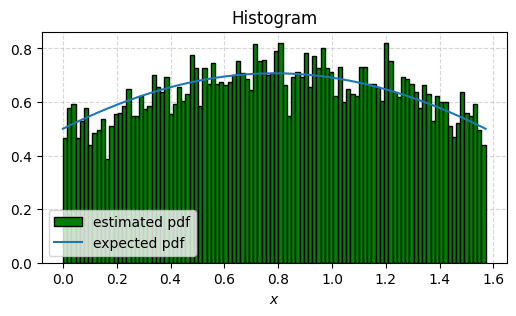

In [22]:
# Построю гистограмму для x
x_pdf_numbers = np.array([f_x_pdf(x) for x in np.linspace(0, math.pi/2, N)])
create_histogram(list_x_y_points[0], 100, (np.linspace(0, math.pi/2, N), x_pdf_numbers) )

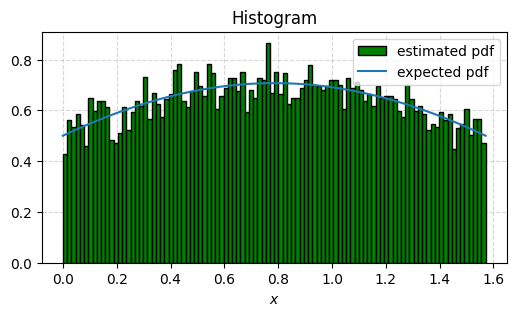

In [23]:
# то же самое для y
y_pdf_numbers = np.array([f_x_pdf(x) for x in np.linspace(0, math.pi/2, N)])
create_histogram(list_x_y_points[1], 100, (np.linspace(0, math.pi/2, N), y_pdf_numbers) )

In [24]:
from scipy import stats


def check_generated_values(theta, points, alpha=0.05):
    N = len(points)
    mu = points.mean()
    sigma = ((points - mu) ** 2).sum() / (N - 1)
    
    beta = 1-alpha
    gamma = (1 + beta) / 2
    t_gamma = stats.t.ppf(gamma, N-1)
    
    low_mu = mu - sigma / np.sqrt(N) * t_gamma
    upper_mu = mu + sigma / np.sqrt(N) * t_gamma
    
    chi_stat = (N - 1) * sigma ** 2
    c1 = stats.chi2.ppf((1 - beta) / 2, N - 1)
    c2 = stats.chi2.ppf((1 + beta) / 2, N - 1)
    
    low_sigma = chi_stat / c2
    upper_sigma = chi_stat / c1
    # Точечная оценка - это число, которое используется для описания параметра генеральной совокупности на основе выборки. Она является случайной величиной и меняется от выборки к выборке при повторном эксперименте. К точечным оценкам предъявляют требования, которым они должны удовлетворять, чтобы хоть в каком-то смысле быть «доброкачественными».
    print('\tТочечная оценка матожидания: ', mu)
    print('\tТочечная оценка дисперсии: ', sigma)

    # Интервальная оценка представляет собой интервал, в котором с заданной вероятностью (надежностью) находится истинное значение математического ожидания.
    print(f'\tПри {beta}% интервальная оценка матожидания: [{low_mu}, {upper_mu}]')
    print(f'\tПри {beta}% интервальная оценка дисперсии: [{low_sigma}, {upper_sigma}]')
    
    ecdf = stats.ecdf(points)
    kolmogorov_stat = max(abs(ecdf.cdf.evaluate(x) - norm.cdf(x)) for x in np.linspace(0, math.pi/2, N)) * np.sqrt(N)

    # р-значение используется для определения статистической значимости наших результатов.
    #p_value = 1 - stats.kstwobign.cdf(kolmogorov_stat)
    #print('\tp_value: ', p_value)


print('- Оценка матожидания, дисперсии для x:')
check_generated_values(0, list_x_y_points[0], alpha=0.05)
print()
print('- Оценка матожидания, дисперсии для y:')
check_generated_values(0, list_x_y_points[1], alpha=0.05)

- Оценка матожидания, дисперсии для x:
	Точечная оценка матожидания:  0.7968834856609834
	Точечная оценка дисперсии:  0.18538144509259322
	При 0.95% интервальная оценка матожидания: [0.7932496362317589, 0.800517335090208]
	При 0.95% интервальная оценка дисперсии: [0.0334332119672026, 0.035339150358122635]

- Оценка матожидания, дисперсии для y:
	Точечная оценка матожидания:  0.7841376889308013
	Точечная оценка дисперсии:  0.18752604557738128
	При 0.95% интервальная оценка матожидания: [0.7804618010157742, 0.7878135768458283]
	При 0.95% интервальная оценка дисперсии: [0.03421123612526969, 0.03616152760177953]


[0.2, 0.14, 0.17500000000000002, 0.315, 0.17]
[0.255, 0.17, 0.15500000000000003, 0.125, 0.29500000000000004]
Теоретические характеристики
Матожидание и Дисперсия для x:  M[x] = 3.115 D[x] = 1.9217749999999985
Матожидание и Дисперсия для y:  M[y] = 3.035 D[y] = 2.493775000000001
Коэффициент корреляции r[xy] = -0.47690403306892615
Фактические характеристики после генерации
M[x] = 3.1231 D[x] = 1.94194639
M[y] = 3.0342000000000002 D[y] = 2.4752303599999976
Коэффициент корреляции r[xy] r = -0.4755035985834626
Доверительный интервал матожидания при 0.9: (3.10, 3.15)
Доверительный интервал матожидания при 0.9: (3.01, 3.06)


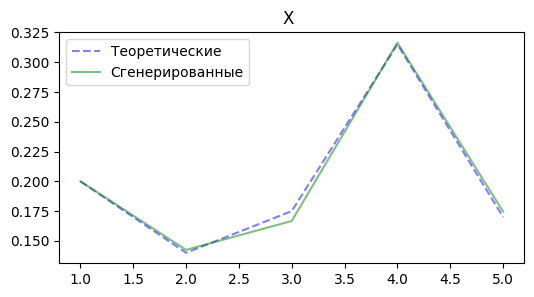

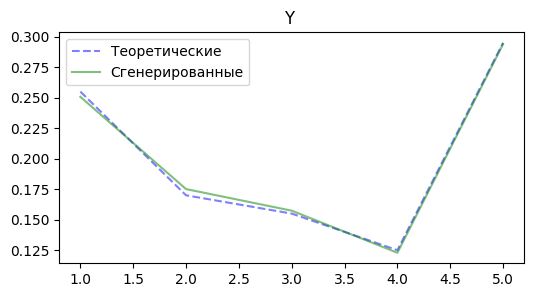

In [25]:
# TASK 2
import numpy as np
import math
import random
import scipy.stats as st
from scipy.stats import nbinom

X = [1, 2, 3, 4, 5]
Y = [1, 2, 3, 4, 5]
# http://mathprofi.ru/sistema_sluchainyh_velichin.html
# Двумерная ДСВ задается законом распределения (обычно представленным в виде таблицы распределения):
# Сумма равна 1-му
P = [
    [0, 0, 0.05, 0.05, 0.1],
    [0.025, 0.025, 0.025, 0.025, 0.04],
    [0.05, 0.025, 0, 0, 0.1],
    [0.11, 0.07, 0.03, 0.05, 0.055],
    [0.070, 0.05, 0.05, 0, 0]
]

# По нему можно найти одномерные законы распределения (составляющих):

p_x = [sum(row) for row in P] # одномерные распределения для x // просто суммы взял по рядам
# zip создает из нескольких списков один
p_y = [sum(y) for y in zip(*P)] # соответственно, по y, по столбцам

print(p_x)
print(p_y)

# сгенерировать значения:
def get_var_and_index(x, F_x, p): # Получает значение и индекс числа по вероятности.
    return next((x[i], i) for i, p_ in enumerate(F_x) if p_ >= p)

n: int = 10 ** 4

x_l, y_l = [], []
F_x = np.cumsum(p_x)
p_yi = [[y / p_x[i] for y in row] for i, row in enumerate(P)]
F_y = [np.cumsum(p_yi[i]) for i in range(len(Y))] # кумулятивная сумма ??
for _ in range(n):
    x, i = get_var_and_index(X, F_x, random.random())
    x_l.append(x)
    y_l.append(get_var_and_index(Y, F_y[i], random.random())[0])

p_x_imp = [x_l.count(X[i]) / n for i in range(len(X))]
p_y_imp = [y_l.count(Y[i]) / n for i in range(len(Y))]


# посчитать значения математического ожидания и дисперсии
M_f = lambda v, p_v: sum([v[i] * p_v[i] for i in range(len(v))])
r_f = lambda M_xy, M_x, M_y, D_x, D_y: (M_xy - M_x * M_y) / math.sqrt(D_x * D_y) # Коэффицент корреляции
def D_f(v, p_v, M = None):
    if M is None:
        M = M_f(v, p_v)
    return sum([(v[i] ** 2) * p_v[i] for i in range(len(v))]) - M ** 2

M_x: float = M_f(X, p_x)
M_y: float = M_f(Y, p_y)
M_xy: float = sum([sum([x * y * P[i][j] for j, y in enumerate(Y)]) for i, x in enumerate(X)])

D_x: float = D_f(X, p_x, M_x)
D_y: float = D_f(Y, p_y, M_y)

print('Теоретические характеристики')
print('Матожидание и Дисперсия для x:  M[x] =', M_x, 'D[x] =', D_x)
print('Матожидание и Дисперсия для y:  M[y] =', M_y, 'D[y] =', D_y)
print('Коэффициент корреляции r[xy] =', r_f(M_xy, M_x, M_y, D_x, D_y))

print('Фактические характеристики после генерации')
print('M[x] =', M_f(X, p_x_imp), 'D[x] =', D_f(X, p_x_imp))
print('M[y] =', M_f(Y, p_y_imp), 'D[y] =', D_f(Y, p_y_imp))
print('Коэффициент корреляции r[xy] r =', st.pearsonr(x_l, y_l)[0])


def calculate_M_and_D_marks(data: list, confidence_level: float) -> None:
    # МАТОЖИДАНИЕ
    mean = np.mean(data) # выборочное среднее
    std = np.std(data) # стандартное отклонение
    n = len(data) # размер выборки
    z_critical = stats.norm.ppf((1 + confidence_level) / 2) # критическое значение стандартного нормального распределения
    lower_bound = mean - z_critical * std / np.sqrt(n)
    upper_bound = mean + z_critical * std / np.sqrt(n)
    print(f'Доверительный интервал матожидания при {confidence_level}: ({lower_bound:.2f}, {upper_bound:.2f})')

    # ДИСПЕРСИЯ
    # variance = np.var(x, ddof=1)
    # alpha: float = 1 - confidence_level
    # t = np.abs(np.round(stats.t.ppf(alpha/2, n-1), 2))
    # interval = (np.round(np.sqrt(variance/n)*t, 2), np.round(np.sqrt(variance/n)*t, 2))
    # print(f'Интервальная оценка дисперсии: [{interval[0]}, {interval[1]}]')

confidence_level: float = 0.9
calculate_M_and_D_marks(x_l, confidence_level)
calculate_M_and_D_marks(y_l, confidence_level)

# Гистограммы
# Для дискретной --- многоугольник распределения !
def draw_distribution_polygon(v, p_v, p_v_imp, var_name):
    plt.figure(figsize=(6, 3))
    plt.plot(v, p_v, label='Теоретические', color='b', alpha=0.5, ls='--')
    plt.plot(v, p_v_imp, label=f'Сгенерированные', color='g', alpha=0.5)
    plt.title(f'{var_name} ')
    plt.legend()
    plt.show()

draw_distribution_polygon(X, p_x, p_x_imp, 'X')
draw_distribution_polygon(Y, p_y, p_y_imp, 'Y')